# Parse IBTrACS file

Parse track information from IBTrACS CSV data file and turn it into MASS filter retrieval files.

Also saves a version of the CSV file as a pandas data frame pickle.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
df = pd.read_csv('/data/users/hsteptoe/ibtracs.WP.list.v04r00.csv', na_values='NaT', skiprows=[1], parse_dates=True,infer_datetime_format=True,
                 usecols=['SID', 'SEASON', 'NAME', 'LAT', 'LON', 'ISO_TIME', 'LANDFALL', 'DIST2LAND', 'STORM_SPEED', 'STORM_DIR'], index_col=['SID', 'ISO_TIME'], )

/opt/scitools/environments/default/2021_03_18-1/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (161,162) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df

SEASON       NAME       LAT      LON  \
SID           ISO_TIME                                                    
1884177N17124 1884-06-24 16:00:00    1884  NOT_NAMED  16.50000  124.000   
              1884-06-24 18:00:00    1884  NOT_NAMED  16.53730  123.800   
              1884-06-24 21:00:00    1884  NOT_NAMED  16.59780  123.500   
              1884-06-25 00:00:00    1884  NOT_NAMED  16.67060  123.200   
              1884-06-25 03:00:00    1884  NOT_NAMED  16.76330  122.900   
...                                   ...        ...       ...      ...   
2021347N05142 2021-12-20 21:00:00    2021        RAI  20.57530  113.689   
              2021-12-21 00:00:00    2021        RAI  21.00000  114.200   
2021351N04104 2021-12-16 18:00:00    2021  NOT_NAMED   4.20000  104.000   
              2021-12-16 21:00:00    2021  NOT_NAMED   4.17547  103.500   
              2021-12-17 00:00:00    2021  NOT_NAMED   4.15063  103.000   

                                   DIST2LAND LANDFALL STORM_SPEED STORM_DIR  
SID           ISO_TIME                                                       
1884177N17124 1884-06-24 16:00:00        165      145           6       281  
              1884-06-24 18:00:00        145      111           6       282  
              1884-06-24 21:00:00        111       77           6       283  
              1884-06-25 00:00:00         77       44           6       286  
              1884-06-25 03:00:00         44       33           6       289  
...                                      ...      ...         ...       ...  
2021347N05142 2021-12-20 21:00:00        162      145          13        48  
              2021-12-21 00:00:00        145                   13        48  
2021351N04104 2021-12-16 18:00:00         56       11          10       267  
              2021-12-16 21:00:00         11        0          10       267  
              2021-12-17 00:00:00          0                   10       267  

[240690 rows x 8 columns]

In [5]:
df.to_pickle('~/projects/ML-TC/WP-ibtracs.pickle')

In [6]:
haishen = df[(df.SEASON == 2020) & (df.NAME == 'HAISHEN')]
haishen

SEASON     NAME      LAT      LON  \
SID           ISO_TIME                                                 
2020244N25146 2020-08-30 12:00:00    2020  HAISHEN  24.9000  145.500   
              2020-08-30 15:00:00    2020  HAISHEN  24.7176  145.715   
              2020-08-30 18:00:00    2020  HAISHEN  24.5000  145.900   
              2020-08-30 21:00:00    2020  HAISHEN  24.2225  146.030   
              2020-08-31 00:00:00    2020  HAISHEN  23.9000  146.100   
...                                   ...      ...      ...      ...   
              2020-09-09 18:00:00    2020  HAISHEN  43.6000  125.100   
              2020-09-09 21:00:00    2020  HAISHEN  43.2352  124.750   
              2020-09-10 00:00:00    2020  HAISHEN  42.9000  124.400   
              2020-09-10 03:00:00    2020  HAISHEN  42.4799  124.162   
              2020-09-10 06:00:00    2020  HAISHEN  42.0000  124.000   

                                   DIST2LAND LANDFALL STORM_SPEED STORM_DIR  
SID           ISO_TIME                                                       
2020244N25146 2020-08-30 12:00:00       1238     1238           5       133  
              2020-08-30 15:00:00       1267     1267           5       138  
              2020-08-30 18:00:00       1296     1296           6       150  
              2020-08-30 21:00:00       1330     1330           6       163  
              2020-08-31 00:00:00       1365     1365           7       172  
...                                      ...      ...         ...       ...  
              2020-09-09 18:00:00          0        0          10       202  
              2020-09-09 21:00:00          0        0           9       216  
              2020-09-10 00:00:00          0        0           9       210  
              2020-09-10 03:00:00          0        0           9       198  
              2020-09-10 06:00:00          0                   10       194  

[87 rows x 8 columns]

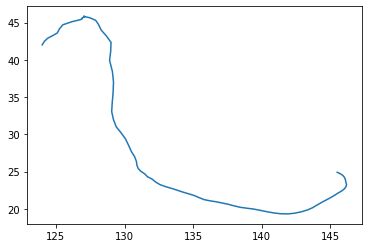

In [7]:
plt.plot(haishen.LON, haishen.LAT)

Filter the grand data frame of tracks to the time period and domain extrent that we have simulations for.

In [4]:
START = np.datetime64('2020-08-07')
END = np.datetime64('2021-10-02')
LONS = (89.9, 153.96)
LATS = (-18, 29.96)

fdf = df[(df.index.get_level_values('ISO_TIME') >= START) & 
   (df.index.get_level_values('ISO_TIME') <= END) & 
   (df.LON >= LONS[0]) & 
   (df.LON <= LONS[1]) & 
   (df.LAT >= LATS[0]) & 
   (df.LAT <= LATS[1])]

In [10]:
# Unique storm IDs
fdf.index.unique(level=0)

42

In [100]:
fdf[fdf.NAME == 'HAISHEN']

SEASON     NAME      LAT      LON  \
SID           ISO_TIME                                                 
2020244N25146 2020-08-30 12:00:00    2020  HAISHEN  24.9000  145.500   
              2020-08-30 15:00:00    2020  HAISHEN  24.7176  145.715   
              2020-08-30 18:00:00    2020  HAISHEN  24.5000  145.900   
              2020-08-30 21:00:00    2020  HAISHEN  24.2225  146.030   
              2020-08-31 00:00:00    2020  HAISHEN  23.9000  146.100   
              2020-08-31 03:00:00    2020  HAISHEN  23.5500  146.130   
              2020-08-31 06:00:00    2020  HAISHEN  23.3000  146.180   
              2020-08-31 09:00:00    2020  HAISHEN  23.0008  146.147   
              2020-08-31 12:00:00    2020  HAISHEN  22.6857  146.029   
              2020-08-31 15:00:00    2020  HAISHEN  22.4000  145.830   
              2020-08-31 18:00:00    2020  HAISHEN  22.1000  145.550   
              2020-08-31 21:00:00    2020  HAISHEN  21.7138  145.221   
              2020-09-01 00:00:00    2020  HAISHEN  21.3778  144.900   
              2020-09-01 03:00:00    2020  HAISHEN  21.1429  144.659   
              2020-09-01 06:00:00    2020  HAISHEN  20.9273  144.436   
              2020-09-01 09:00:00    2020  HAISHEN  20.6883  144.210   
              2020-09-01 12:00:00    2020  HAISHEN  20.4333  143.967   
              2020-09-01 15:00:00    2020  HAISHEN  20.1473  143.707   
              2020-09-01 18:00:00    2020  HAISHEN  19.8667  143.367   
              2020-09-01 21:00:00    2020  HAISHEN  19.5959  142.894   
              2020-09-02 00:00:00    2020  HAISHEN  19.4000  142.367   
              2020-09-02 03:00:00    2020  HAISHEN  19.3115  141.883   
              2020-09-02 06:00:00    2020  HAISHEN  19.3333  141.400   
              2020-09-02 09:00:00    2020  HAISHEN  19.4341  140.903   
              2020-09-02 12:00:00    2020  HAISHEN  19.6000  140.400   
              2020-09-02 15:00:00    2020  HAISHEN  19.7857  139.898   
              2020-09-02 18:00:00    2020  HAISHEN  19.9667  139.400   
              2020-09-02 21:00:00    2020  HAISHEN  20.0807  138.906   
              2020-09-03 00:00:00    2020  HAISHEN  20.2000  138.433   
              2020-09-03 03:00:00    2020  HAISHEN  20.3898  138.000   
              2020-09-03 06:00:00    2020  HAISHEN  20.6000  137.567   
              2020-09-03 09:00:00    2020  HAISHEN  20.7934  137.078   
              2020-09-03 12:00:00    2020  HAISHEN  20.9667  136.600   
              2020-09-03 15:00:00    2020  HAISHEN  21.0874  136.180   
              2020-09-03 18:00:00    2020  HAISHEN  21.2333  135.800   
              2020-09-03 21:00:00    2020  HAISHEN  21.4848  135.452   
              2020-09-04 00:00:00    2020  HAISHEN  21.7667  135.100   
              2020-09-04 03:00:00    2020  HAISHEN  22.0050  134.688   
              2020-09-04 06:00:00    2020  HAISHEN  22.2333  134.267   
              2020-09-04 09:00:00    2020  HAISHEN  22.4615  133.888   
              2020-09-04 12:00:00    2020  HAISHEN  22.7000  133.500   
              2020-09-04 15:00:00    2020  HAISHEN  22.9486  133.035   
              2020-09-04 18:00:00    2020  HAISHEN  23.2333  132.600   
              2020-09-04 21:00:00    2020  HAISHEN  23.5757  132.282   
              2020-09-05 00:00:00    2020  HAISHEN  24.0000  132.000   
              2020-09-05 03:00:00    2020  HAISHEN  24.3025  131.676   
              2020-09-05 06:00:00    2020  HAISHEN  24.7000  131.467   
              2020-09-05 09:00:00    2020  HAISHEN  25.0208  131.197   
              2020-09-05 12:00:00    2020  HAISHEN  25.4000  131.000   
              2020-09-05 15:00:00    2020  HAISHEN  25.8174  130.911   
              2020-09-05 18:00:00    2020  HAISHEN  26.3667  130.867   
              2020-09-05 21:00:00    2020  HAISHEN  27.0125  130.732   
              2020-09-06 00:00:00    2020  HAISHEN  27.7000  130.500   
              2020-09-06 03:00:00    2020  HAISHEN  28.5208  130.298   
   

Make `moo select` retrieval files

In [7]:
# Stash list
# 03463 - WIND GUST  (M/S)
# 03226 - 10 METRE WIND V-COMP
# 03225 - 10 METRE WIND U-COMP
# 15201 - U WIND ON PRESSURE LEVELS    B GRID
# 15202 - V WIND ON PRESSURE LEVELS    B GRID
# 02205 - OUTGOING LW RAD FLUX (TOA)
# 16222 - PRESSURE AT MEAN SEA LEVEL
# 16203 - TEMPERATURE ON P LEV/P GRID
# 05216 - TOTAL PRECIPITATION RATE     KG/M2/S
# 4201 - LARGE SCALE RAIN AMOUNT     KG/M2/TS

FLT = '*km4p4_ra2t_pver*'

def write_moo_select(outname, sdate, edate, fileflt):
    """
    Write basic text file for use with moo select
    """
    lines = ['begin_global', 
             '    pp_file="'+fileflt+'"', 
             '    T1>={'+sdate+'}', 
             '    T1<={'+edate+'}',
             '    lbft > 24',
             '    lbft <= 36', # Limit to 12 hours free-run
             'end_global',
             'begin',
             '    stash=04203',
             '    lbproc=128',
             'end',
             'begin',
             '    stash=(03463, 03226, 03225, 02205, 16222)',
             'end']
    with open(f'{outname}-moofilter', 'w') as f:
        f.write('\n'.join(lines))

# Loop over storm IDs
for id in fdf.index.unique(level=0):
    write_moo_select(f'/project/ciid/projects/ML-TC/mass/{id}',
                     fdf[fdf.index.get_level_values('SID') == id].index.get_level_values('ISO_TIME').min().strftime("%Y/%m/%d %H:00"),
                     fdf[fdf.index.get_level_values('SID') == id].index.get_level_values('ISO_TIME').max().strftime("%Y/%m/%d %H:00"),
                     FLT)

# Make netCDF files from PP files

In [6]:
fdf[fdf.index.get_level_values('SID') == '2021189N20108']

SEASON       NAME      LAT      LON  \
SID           ISO_TIME                                                   
2021189N20108 2021-07-07 12:00:00    2021  NOT_NAMED  19.6000  107.600   
              2021-07-07 15:00:00    2021  NOT_NAMED  19.8856  106.978   
              2021-07-07 18:00:00    2021  NOT_NAMED  20.2000  106.400   
              2021-07-07 21:00:00    2021  NOT_NAMED  20.5572  105.892   
              2021-07-08 00:00:00    2021  NOT_NAMED  20.9000  105.400   
              2021-07-08 03:00:00    2021  NOT_NAMED  21.1798  104.865   
              2021-07-08 06:00:00    2021  NOT_NAMED  21.4000  104.300   
              2021-07-08 09:00:00    2021  NOT_NAMED  21.5655  103.708   
              2021-07-08 12:00:00    2021  NOT_NAMED  21.7000  103.100   

                                   DIST2LAND LANDFALL STORM_SPEED STORM_DIR  
SID           ISO_TIME                                                       
2021189N20108 2021-07-07 12:00:00        110       61          13       296  
              2021-07-07 15:00:00         61        0          13       298  
              2021-07-07 18:00:00          0        0          12       303  
              2021-07-07 21:00:00          0        0          12       307  
              2021-07-08 00:00:00          0        0          11       303  
              2021-07-08 03:00:00          0        0          11       296  
              2021-07-08 06:00:00          0        0          11       290  
              2021-07-08 09:00:00          0        0          12       285  
              2021-07-08 12:00:00          0                   12       283

In [158]:
PAD = 5 # Padding to add to lat/lon constraint (degrees)

# Loop over SIDs
# for id in fdf.index.unique(level=0)[-2:-1]:
for id in ['2021189N20108',]:
    # Make dataframe for one SID
    sid_df = fdf[fdf.index.get_level_values('SID') == id]
    # Get pp files relating to SID based on date
    basedate = set(sid_df.index.get_level_values('ISO_TIME').strftime("%Y%m%d"))
    files = []
    for d in list(basedate):
        files += list(glob.glob(f'/spice/scratch/hsteptoe/{d}*.pp'))
    if not files:
        # No files found
        print(f'No files found for {id}. Moving on...')
        pass
    else:
        # Make netCDF files
        sid_lats = (sid_df.LAT.min()-PAD, sid_df.LAT.max()+PAD)
        sid_lons = (sid_df.LON.min()-PAD, sid_df.LON.max()+PAD)
        cubes = iris.load(files,
                         iris.Constraint(latitude = lambda cell: sid_df.LAT.min() <= cell <= sid_df.LAT.max(), 
                                         longitude = lambda cell: sid_df.LON.min() <= cell <= sid_df.LON.max()))

KeyboardInterrupt: 

In [163]:
cubes = iris.load(files[0],
                         iris.Constraint(latitude = lambda cell: sid_df.LAT.min() <= cell <= sid_df.LAT.max(), 
                                         longitude = lambda cell: sid_df.LON.min() <= cell <= sid_df.LON.max()))

In [164]:
cubes

[<iris 'Cube' of air_pressure_at_sea_level / (Pa) (time: 11; latitude: 447; longitude: 303)>,
<iris 'Cube' of stratiform_rainfall_flux / (kg m-2 s-1) (time: 11; latitude: 447; longitude: 303)>,
<iris 'Cube' of stratiform_rainfall_flux / (kg m-2 s-1) (time: 12; latitude: 447; longitude: 303)>]

In [165]:
import iris.quickplot as qplt

/opt/scitools/environments/default/2021_03_18-1/lib/python3.6/site-packages/iris/coords.py:1786: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  "contiguous bounds.".format(self.name())
/opt/scitools/environments/default/2021_03_18-1/lib/python3.6/site-packages/iris/coords.py:1786: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  "contiguous bounds.".format(self.name())


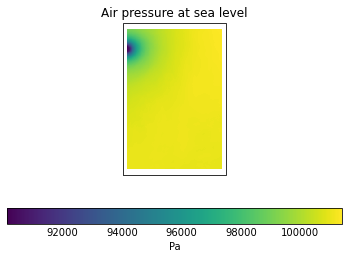

In [167]:
qplt.pcolormesh(cubes[0][9,:,:])